In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
df_openMP = pd.read_csv('openMP.csv')
df_openMP.shape

(15360, 11)

In [236]:
df_openMP.head()

,m,k,NZ,threads,chunk size,CRS,ELLPACK,CRS performance,ELLPACK performance,Serial CRS performance,Serial ELLPACK performance
0,121192,1,2624331,1,2,1,1,0.603573,0.409776,1.17206,0.534086
1,121192,1,2624331,1,4,1,1,0.664878,0.415187,1.17206,0.534086
2,121192,1,2624331,1,8,1,1,0.699079,0.423185,1.17206,0.534086
3,121192,1,2624331,1,16,1,1,0.717896,0.426806,1.17206,0.534086
4,121192,1,2624331,1,32,1,1,0.728205,0.428357,1.17206,0.534086


In [237]:
df_openMPf = df_openMP[(df_openMP['CRS'] == 1) & (df_openMP['ELLPACK'] == 1)]
df_openMP.shape

(15360, 11)

In [238]:
def getMatrixName(m):
    if m == 2597:
        return 'cavity10'
    if m == 161070:
        return 'PR02R'
    if m == 1062400:
        return 'nlpkkt80'
    if m == 2164760:
        return 'Cube_Coup_dt0'
    if m == 1090920:
        return 'roadNet-PA'
    if m == 377002:
        return 'ML_Laplace'
    if m == 10974:
        return 'bcsstk17'
    if m == 416:
        return 'mhda416'
    if m == 503625:
        return 'af_1_k101'
    if m == 82654:
        return 'thermal1'
    if m == 1228045:
        return 'thermal2'
    if m == 102158:
        return 'thermomech_TK'
    if m == 9:
        return 'cage4'
    if m == 62451:
        return 'cant'
    if m == 116835:
        return 'dc1'
    if m == 3242:
        return 'raefsky2'
    if m == 3198:
        return 'rdist2'
    if m == 765:
        return 'mcfe'
    if m == 1000:
        return 'olm1000'
    if m == 109460:
        return 'lung2'
    if m == 1000005:
        return 'webbase-1M'
    if m == 4800:
        return 'mhd4800a'
    if m == 2021:
        return 'west2021'
    if m == 1813:
        return 'adder_dcop_32'
    if m == 206500:
        return 'mac_econ_fwd500'
    if m == 17880:
        return 'FEM_3D_thermal1'
    if m == 262111:
        return 'amazon0302'
    if m == 121192:
        return 'cop20k_A'
    if m == 16146:
        return 'olafu'
    if m == 24:
        return 'can_24'
    if m == 23560:
        return 'af23560' 
    if m == 416:
        return 'mhda416'
    else:
        print("Problem with m = ", m)
    
df_openMP['Matrix'] = df_openMP['m'].apply(getMatrixName)
df_openMP['Matrix'].value_counts()

Matrix
cop20k_A           512
adder_dcop_32      512
roadNet-PA         512
olm1000            512
lung2              512
webbase-1M         512
west2021           512
thermomech_TK      512
thermal2           512
thermal1           512
rdist2             512
raefsky2           512
PR02R              512
olafu              512
nlpkkt80           512
ML_Laplace         512
mhd4800a           512
mcfe               512
mac_econ_fwd500    512
FEM_3D_thermal1    512
Cube_Coup_dt0      512
dc1                512
cage4              512
cavity10           512
cant               512
amazon0302         512
af23560            512
af_1_k101          512
bcsstk17           512
mhda416            512
Name: count, dtype: int64

In [239]:
df_openMP.head()    

,m,k,NZ,threads,chunk size,CRS,ELLPACK,CRS performance,ELLPACK performance,Serial CRS performance,Serial ELLPACK performance,Matrix
0,121192,1,2624331,1,2,1,1,0.603573,0.409776,1.17206,0.534086,cop20k_A
1,121192,1,2624331,1,4,1,1,0.664878,0.415187,1.17206,0.534086,cop20k_A
2,121192,1,2624331,1,8,1,1,0.699079,0.423185,1.17206,0.534086,cop20k_A
3,121192,1,2624331,1,16,1,1,0.717896,0.426806,1.17206,0.534086,cop20k_A
4,121192,1,2624331,1,32,1,1,0.728205,0.428357,1.17206,0.534086,cop20k_A


In [240]:
serial_df = df_openMP[['Matrix', 'm', 'k', 'NZ', 'Serial CRS performance', 'Serial ELLPACK performance']].groupby(['Matrix', 'k', 'NZ', 'm']).mean().reset_index().sort_values(by='NZ', ascending=False)
serial_df.head()

,Matrix,k,NZ,m,Serial CRS performance,Serial ELLPACK performance
0,Cube_Coup_dt0,1,127206144,2164760,1.341144,0.634013
2,Cube_Coup_dt0,3,127206144,2164760,3.778294,1.594785
3,Cube_Coup_dt0,6,127206144,2164760,6.203452,2.665248
1,Cube_Coup_dt0,2,127206144,2164760,2.676199,1.254032
8,ML_Laplace,1,55002942,377002,1.308588,0.644676


In [241]:
df_best_CRS = df_openMP[['Matrix', 'k', 'NZ', 'threads', 'chunk size', 'CRS performance']]\
    .groupby(['Matrix', 'k', 'threads'])\
    .apply(lambda x: x.loc[x['CRS performance'].idxmax()])\
    .reset_index(drop=True)
df_best_CRS

,Matrix,k,NZ,threads,chunk size,CRS performance
0,Cube_Coup_dt0,1,127206144,1,256,0.992368
1,Cube_Coup_dt0,1,127206144,2,256,1.862110
2,Cube_Coup_dt0,1,127206144,3,256,2.773650
3,Cube_Coup_dt0,1,127206144,4,256,3.624110
4,Cube_Coup_dt0,1,127206144,5,256,4.273520
...,...,...,...,...,...,...
1915,west2021,6,7353,12,64,3.472670
1916,west2021,6,7353,13,32,3.481010
1917,west2021,6,7353,14,64,3.626880
1918,west2021,6,7353,15,64,3.617570


In [242]:
df_best_ELLPACK = df_openMP[['Matrix', 'k', 'NZ', 'threads', 'chunk size', 'ELLPACK performance']]\
    .groupby(['Matrix', 'k', 'threads'])\
    .apply(lambda x: x.loc[x['ELLPACK performance'].idxmax()])\
    .reset_index(drop=True)
df_best_ELLPACK

,Matrix,k,NZ,threads,chunk size,ELLPACK performance
0,Cube_Coup_dt0,1,127206144,1,256,0.580548
1,Cube_Coup_dt0,1,127206144,2,256,1.128760
2,Cube_Coup_dt0,1,127206144,3,256,1.685530
3,Cube_Coup_dt0,1,127206144,4,256,2.228080
4,Cube_Coup_dt0,1,127206144,5,256,2.672270
...,...,...,...,...,...,...
1915,west2021,6,7353,12,64,2.644710
1916,west2021,6,7353,13,64,2.790020
1917,west2021,6,7353,14,32,2.767820
1918,west2021,6,7353,15,32,2.804890


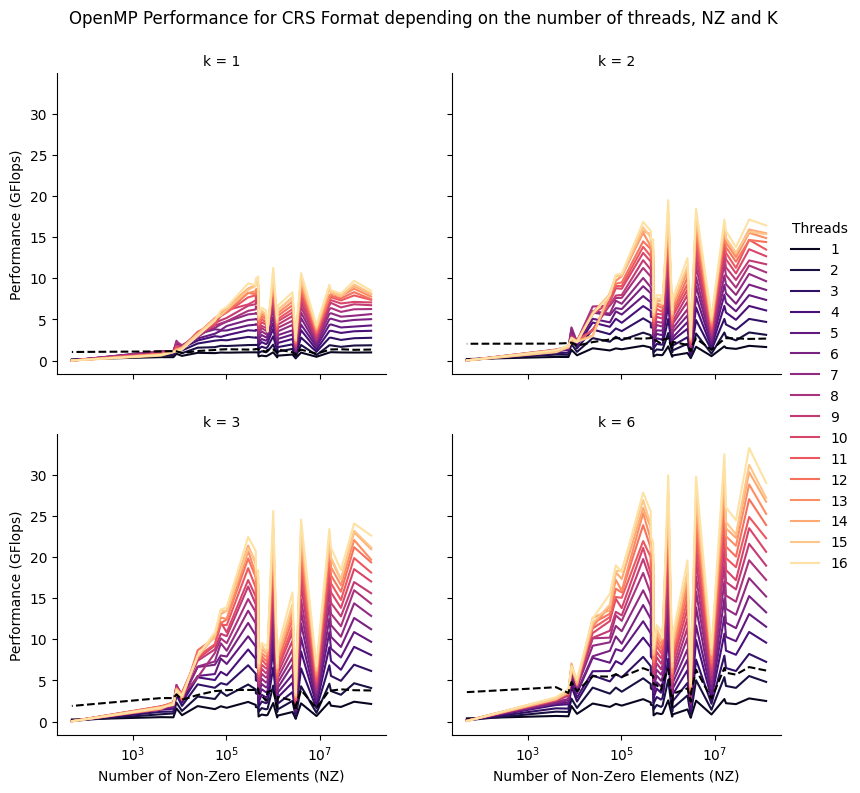

In [243]:
# Order NZ values for better visualization
df_best_CRS = df_best_CRS.sort_values(by='NZ')

g = sns.FacetGrid(df_best_CRS, col="k", hue="threads", col_wrap=2, height=4, palette="magma", sharex=True, sharey=True)

# Ajouter des lignes pour chaque grille avec les performances en fonction des threads
g = g.map(sns.lineplot, "NZ", "CRS performance")

# Add the Serial CRS performance in each graph
for ax in g.axes:
    serial_df_k = serial_df[serial_df['k'] == int(ax.title.get_text().split('=')[1])]
    ax.plot(serial_df_k['NZ'], serial_df_k['Serial CRS performance'], label='Serial', color='black', linestyle='--')


# Ajouter un titre global avec plt.subplots_adjust()
plt.subplots_adjust(top=0.9)
plt.xscale('log')
g.fig.suptitle('OpenMP Performance for CRS Format depending on the number of threads, NZ and K')

# Ajouter un titre pour chaque sous-graphique indiquant la valeur de 'k'
g.set_titles("k = {col_name}")
g.set_xlabels("Number of Non-Zero Elements (NZ)")
g.set_ylabels("Performance (GFlops)")

# Ajouter des légendes
g.add_legend(title="Threads")

# Ajuster l'espace entre les graphiques pour clarté
g.fig.subplots_adjust(hspace=0.2, wspace=0.2)

# Sauvegarder le graphique
plt.savefig("./images/openMP_Threads_CRS.png", dpi=300)

plt.show()

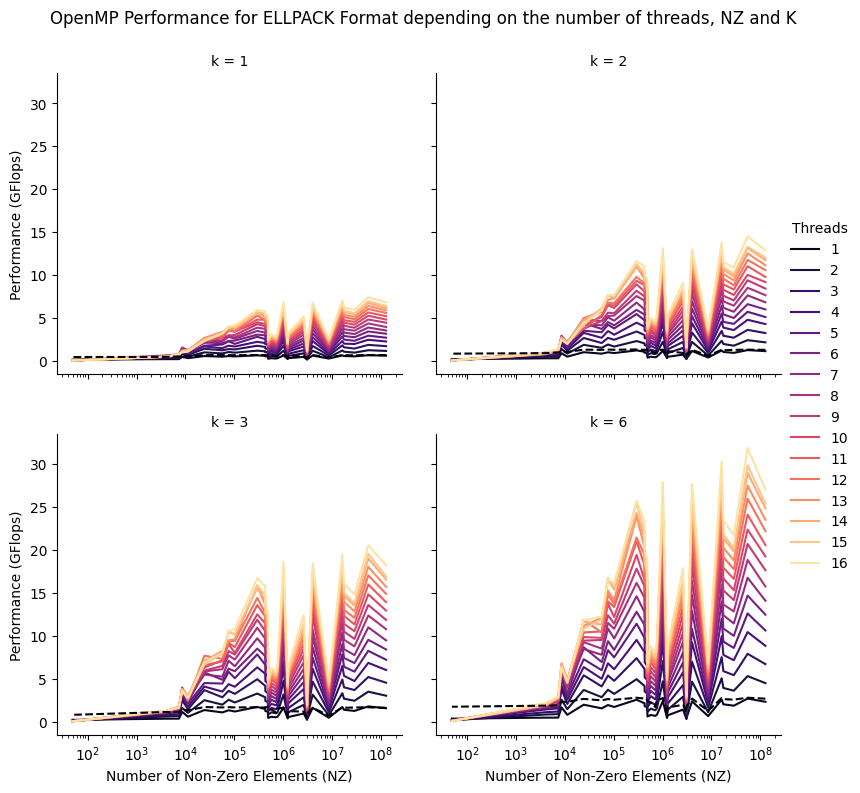

In [244]:
# Order NZ values for better visualization
df_best_ELLPACK = df_best_ELLPACK.sort_values(by='NZ')

g = sns.FacetGrid(df_best_ELLPACK, col="k", hue="threads", col_wrap=2, height=4, palette="magma", sharex=True, sharey=True)

# Ajouter des lignes pour chaque grille avec les performances en fonction des threads
g = g.map(sns.lineplot, "NZ", "ELLPACK performance")

# Add the Serial CRS performance in each graph
for ax in g.axes:
    serial_df_k = serial_df[serial_df['k'] == int(ax.title.get_text().split('=')[1])]
    ax.plot(serial_df_k['NZ'], serial_df_k['Serial ELLPACK performance'], label='Serial', color='black', linestyle='--')

# Ajouter un titre global avec plt.subplots_adjust()
plt.subplots_adjust(top=0.9)
plt.xscale('log')
g.fig.suptitle('OpenMP Performance for ELLPACK Format depending on the number of threads, NZ and K')

# Ajouter un titre pour chaque sous-graphique indiquant la valeur de 'k'
g.set_titles("k = {col_name}")
g.set_xlabels("Number of Non-Zero Elements (NZ)")
g.set_ylabels("Performance (GFlops)")

# Ajouter des légendes
g.add_legend(title="Threads")

# Ajuster l'espace entre les graphiques pour clarté
g.fig.subplots_adjust(hspace=0.2, wspace=0.1)

# Sauvegarder le graphique
plt.savefig("./images/openMP_Threads_ELLPACK.png", dpi=300)

plt.show()


In [245]:
# Order NZ values for better visualization
df_threads16 = df_openMP[(df_openMP['threads'] == 16)].sort_values(by='NZ')

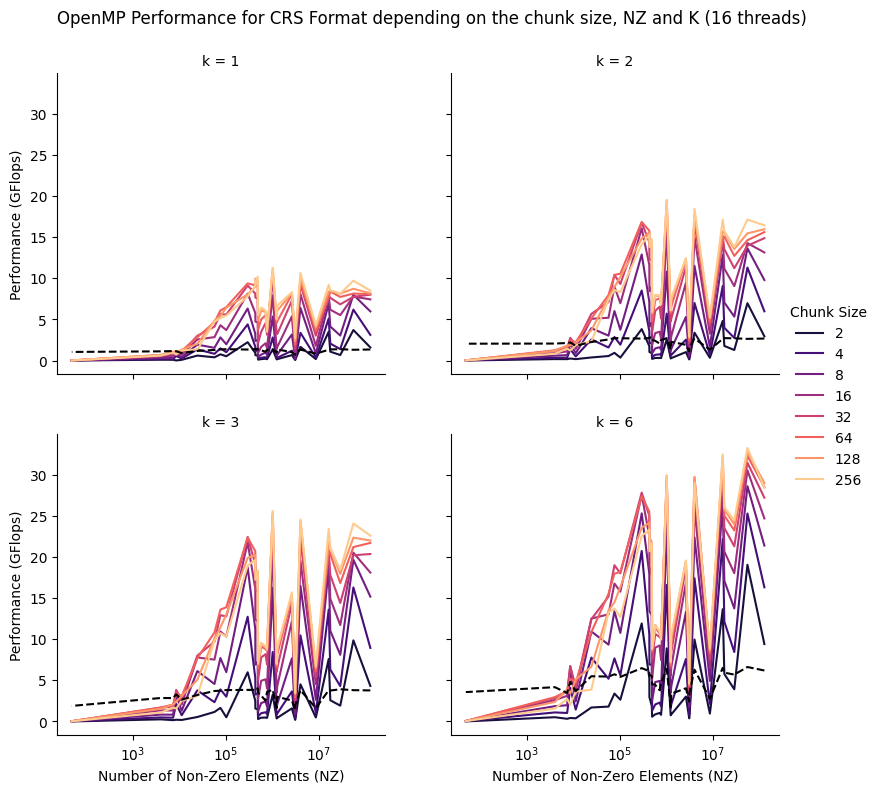

In [246]:
g = sns.FacetGrid(df_threads16, col="k", hue="chunk size", col_wrap=2, height=4, palette="magma", sharex=True, sharey=True)

# Ajouter des lignes pour chaque grille avec les performances en fonction des threads
g = g.map(sns.lineplot, "NZ", "CRS performance")

# Add the Serial CRS performance in each graph
for ax in g.axes:
    serial_df_k = serial_df[serial_df['k'] == int(ax.title.get_text().split('=')[1])]
    ax.plot(serial_df_k['NZ'], serial_df_k['Serial CRS performance'], label='Serial', color='black', linestyle='--')

# Ajouter un titre global avec plt.subplots_adjust()
plt.subplots_adjust(top=0.9)
plt.xscale('log')
g.fig.suptitle('OpenMP Performance for CRS Format depending on the chunk size, NZ and K (16 threads)')

# Ajouter un titre pour chaque sous-graphique indiquant la valeur de 'k'
g.set_titles("k = {col_name}")
g.set_xlabels("Number of Non-Zero Elements (NZ)")
g.set_ylabels("Performance (GFlops)")

# Ajouter des légendes
g.add_legend(title="Chunk Size")

# Ajuster l'espace entre les graphiques pour clarté
g.fig.subplots_adjust(hspace=0.2, wspace=0.2)

# Sauvegarder le graphique
plt.savefig("./images/openMP_ChunkSize_CRS.png", dpi=300)

plt.show()

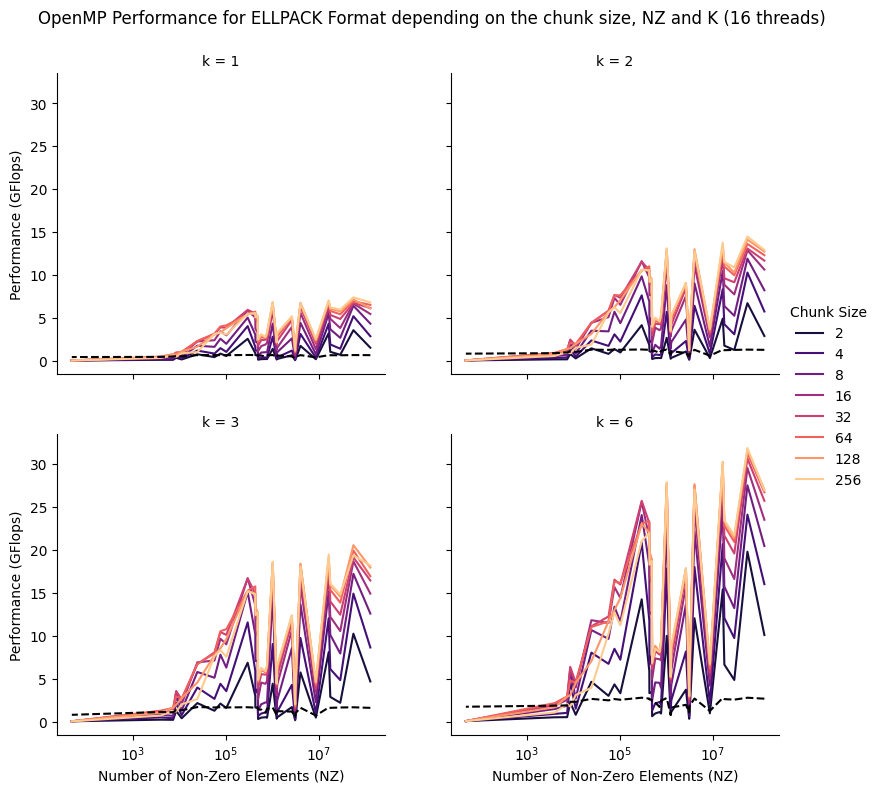

In [247]:
g = sns.FacetGrid(df_threads16, col="k", hue="chunk size", col_wrap=2, height=4, palette="magma", sharex=True, sharey=True)

# Ajouter des lignes pour chaque grille avec les performances en fonction des threads
g = g.map(sns.lineplot, "NZ", "ELLPACK performance")

# Add the Serial CRS performance in each graph
for ax in g.axes:
    serial_df_k = serial_df[serial_df['k'] == int(ax.title.get_text().split('=')[1])]
    ax.plot(serial_df_k['NZ'], serial_df_k['Serial ELLPACK performance'], label='Serial', color='black', linestyle='--')

# Ajouter un titre global avec plt.subplots_adjust()
plt.subplots_adjust(top=0.9)
plt.xscale('log')
g.fig.suptitle('OpenMP Performance for ELLPACK Format depending on the chunk size, NZ and K (16 threads)')

# Ajouter un titre pour chaque sous-graphique indiquant la valeur de 'k'
g.set_titles("k = {col_name}")
g.set_xlabels("Number of Non-Zero Elements (NZ)")
g.set_ylabels("Performance (GFlops)")

# Ajouter des légendes
g.add_legend(title="Chunk Size")

# Ajuster l'espace entre les graphiques pour clarté
g.fig.subplots_adjust(hspace=0.2, wspace=0.2)

# Sauvegarder le graphique
plt.savefig("./images/openMP_ChunkSize_ELLPACK.png", dpi=300)

plt.show()


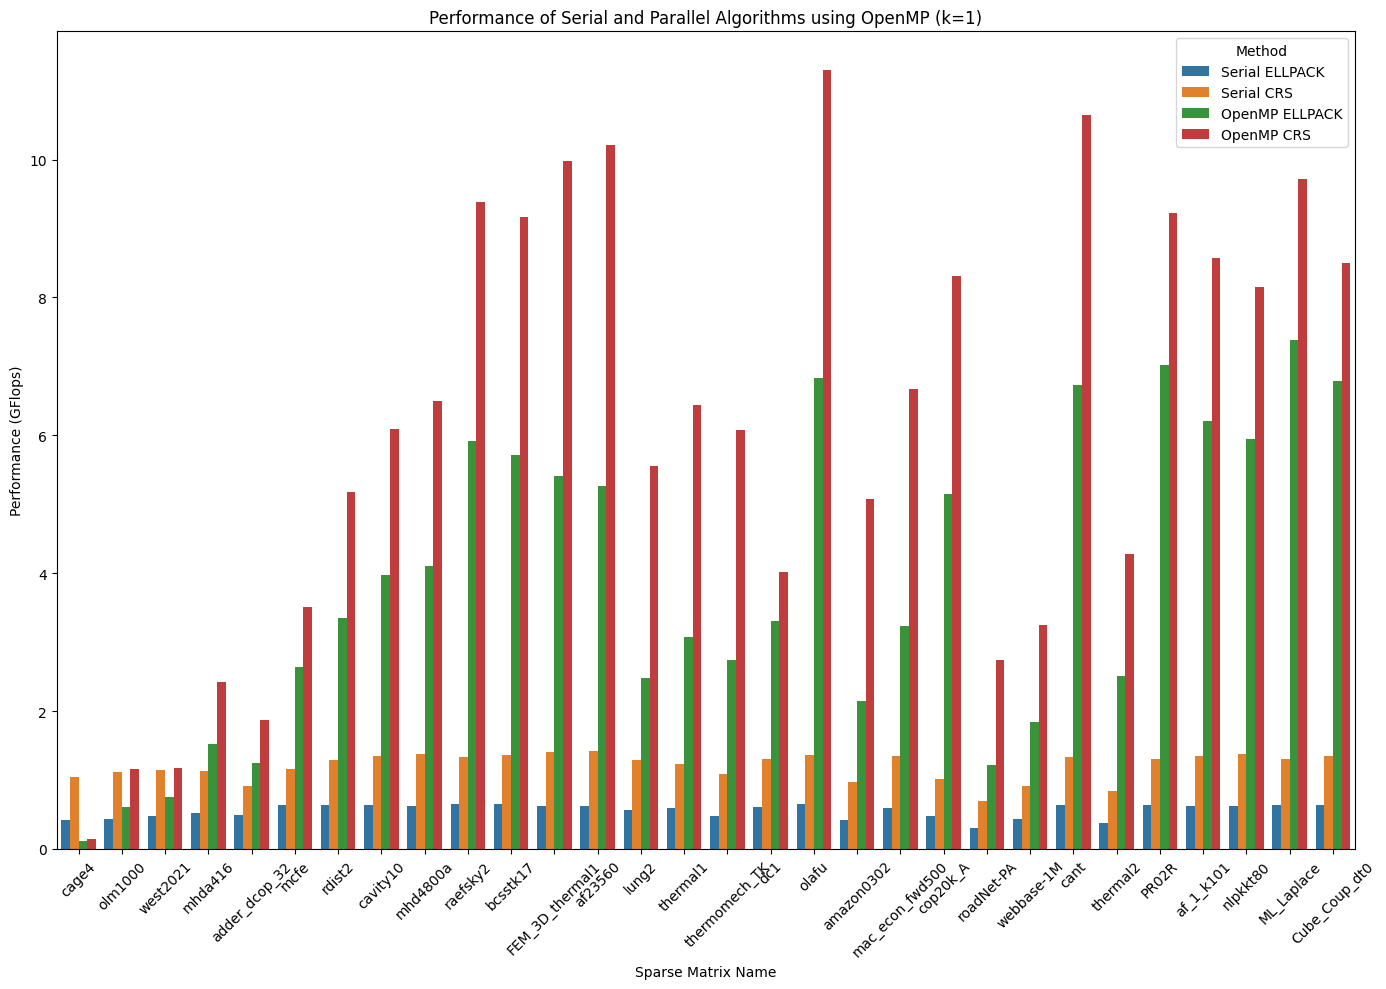

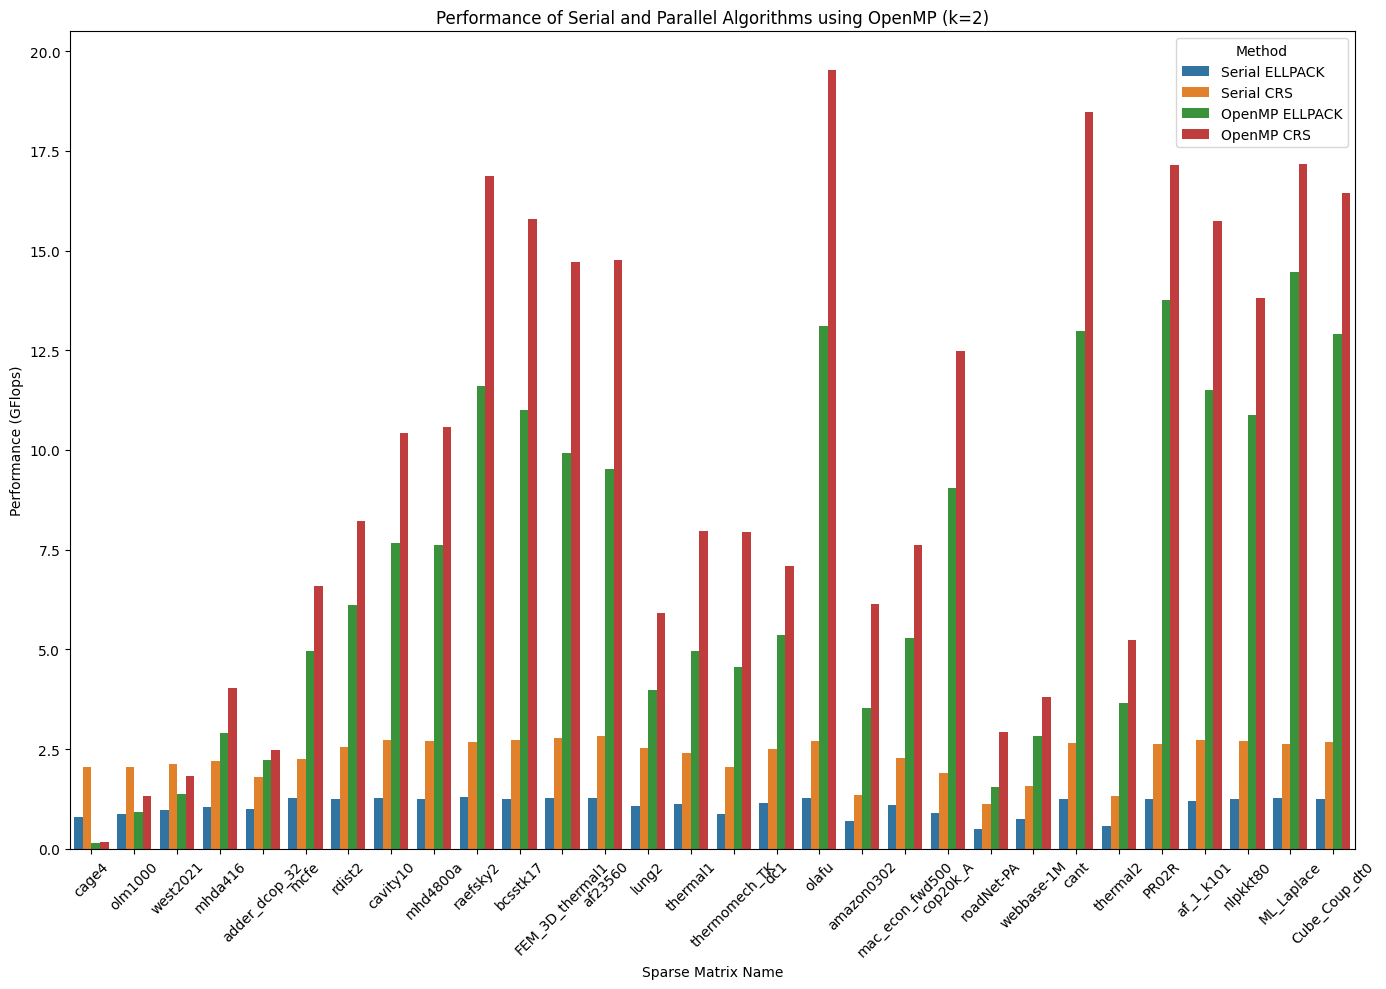

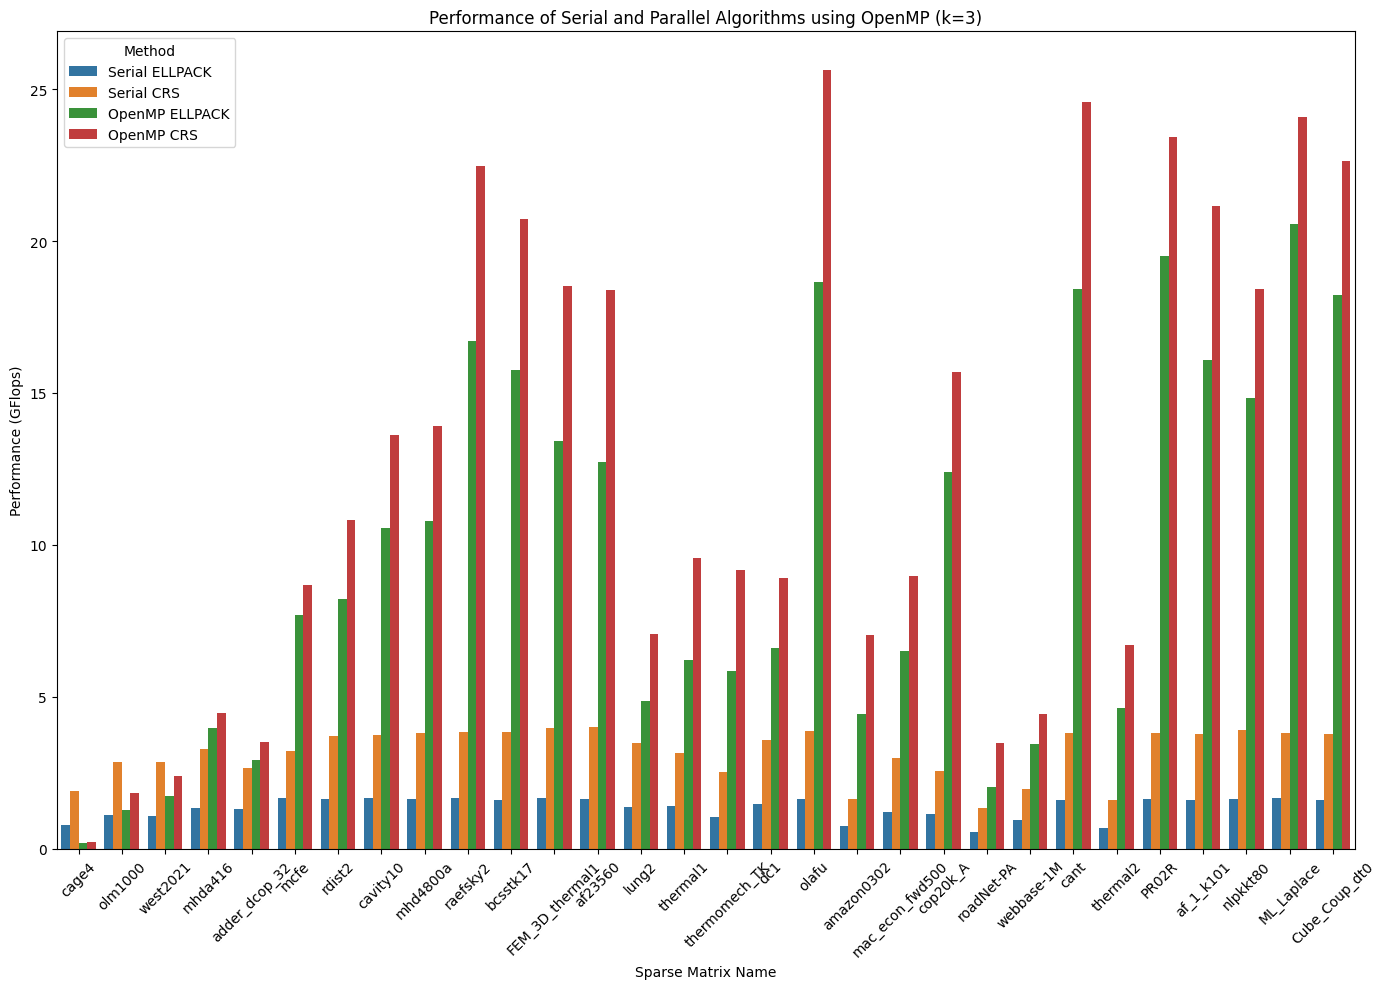

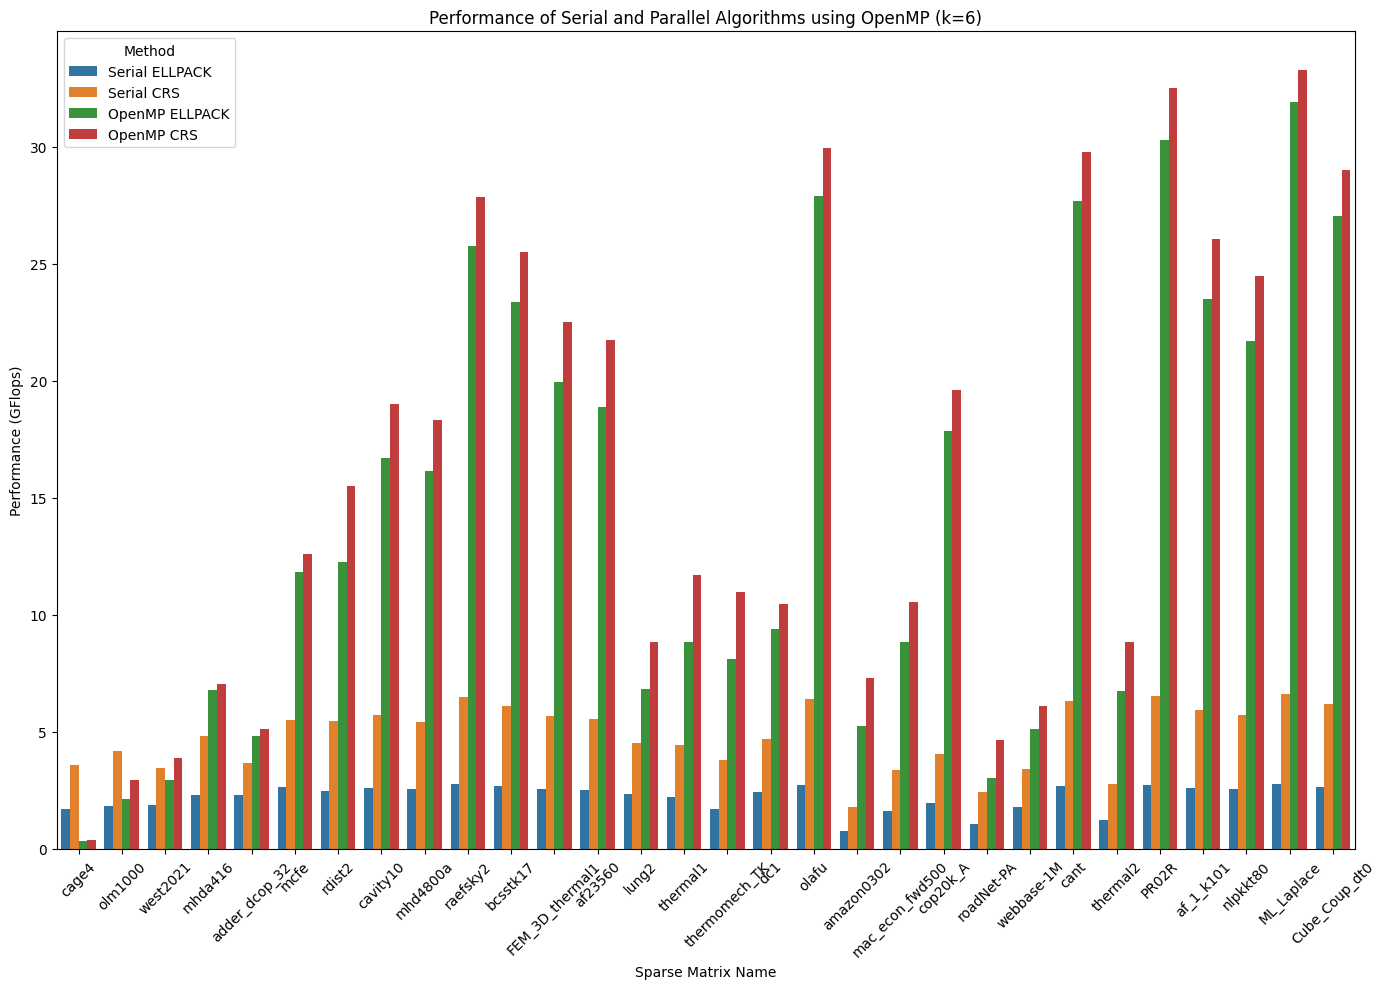

In [248]:
for index, k_value in enumerate(df_openMP["k"].unique()):
    df_sorted = df_openMP[df_openMP["k"] == k_value].sort_values("NZ")

    best_crs_perf = df_sorted.loc[
        df_sorted.groupby("Matrix")["CRS performance"].idxmax(),
        ["Matrix", "NZ", "CRS performance"]
    ]
    best_ellpack_perf = df_sorted.loc[
        df_sorted.groupby("Matrix")["ELLPACK performance"].idxmax(),
        ["Matrix", "NZ", "ELLPACK performance"]
    ]

    # Fusion avec 'serial_df' – Assurez-vous que 'serial_df' est correctement préparé pour cette opération
    df_best_perf = pd.merge(
        best_crs_perf,
        best_ellpack_perf,
        on=["Matrix", "NZ"],
        how="outer",
        suffixes=("_CRS", "_ELLPACK")
    )
    df_best_perf = pd.merge(
        df_best_perf,
        serial_df[serial_df["k"] == k_value],
        on=["Matrix", "NZ"],
        how="outer"
    )

    # Transformation des données
    df_melted = df_best_perf.melt(
        id_vars=["Matrix", "NZ"], 
        value_vars=[
            "CRS performance", 
            "ELLPACK performance", 
            "Serial CRS performance", 
            "Serial ELLPACK performance"
        ],
        var_name="Method", 
        value_name="Performance"
    )

    # Personnalisation des noms de méthode
    method_mapping = {
        "CRS performance": "OpenMP CRS",
        "ELLPACK performance": "OpenMP ELLPACK",
        "Serial CRS performance": "Serial CRS",
        "Serial ELLPACK performance": "Serial ELLPACK"
    }
    df_melted["Method"] = df_melted["Method"].map(method_mapping)

    # Order by NZ
    df_melted = df_melted.sort_values("NZ")

    plt.figure(figsize=(14, 10))
    sns.barplot(
        data=df_melted,
        x="Matrix",
        y="Performance",
        hue="Method",
        dodge=True,
    )

    plt.title(f"Performance of Serial and Parallel Algorithms using OpenMP (k={k_value})")
    plt.xlabel("Sparse Matrix Name")
    plt.ylabel("Performance (GFlops)")
    plt.xticks(rotation=45)
    plt.legend(title="Method")
    plt.tight_layout()

    # Sauvegarder le graphique
    plt.savefig(f"./images/openMP_Performance_k{k_value}.png", dpi=300)

    plt.show()
